In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sklearn
import matplotlib

matplotlib.pyplot.rcdefaults()
plt.xkcd()

In [19]:
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 16

Straight line plots

In [3]:
xs = np.linspace(0,1,15)
ys = 1 + 2*xs + norm.rvs(0,0.2,size=len(xs), random_state=1)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size=0.3, random_state=2)

In [97]:
xs = np.linspace(-0.05,1.05,101)

deg=8
fit1 = np.polyfit(xs_train, ys_train, deg=deg)
# fit1 = [1.5, 1.1]

yfit_train=0
yfit_test=0
yfit_plot=0
for i in range(deg+1):
    yfit_train += fit1[i] * np.power(xs_train, deg-i)
    yfit_test += fit1[i] * np.power(xs_test, deg-i)
    yfit_plot += fit1[i] * np.power(xs, deg-i)
    
# yfit_train = fit1[5] + fit1[0]*xs_train
# yfit_test = fit1[1] + fit1[0]*xs_test

# yfit0 = 0.6 + 1.8*xarr

loss_train = np.sqrt(np.mean((yfit_train-ys_train)**2))
loss_test = np.sqrt(np.mean((yfit_test-ys_test)**2))

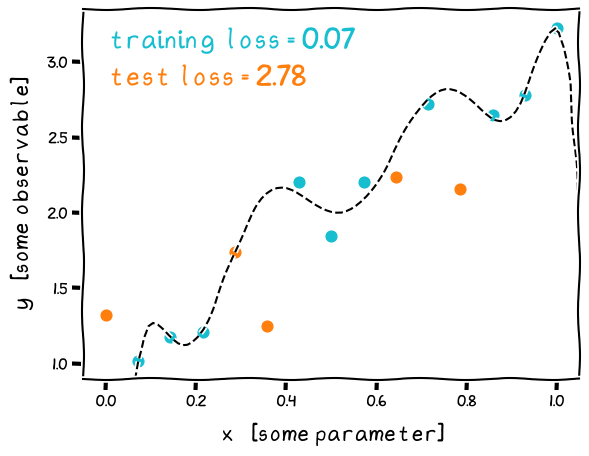

In [98]:
plt.scatter(xs_train, ys_train, color='C9', s=60)
plt.scatter(xs_test, ys_test, color='C1', s=60)


# plt.figure(figsize=(3,6))

# ys = fit1[1]+fit1[0]*xs
plt.plot(xs, yfit_plot, color='k', ls='--', lw=1.5)
plt.xlim(-0.05, 1.05)
plt.ylim(0.9, 3.35)

plt.annotate(f'training loss = {loss_train:0.2f}', xy=(0.05,0.95), xycoords='axes fraction', color='C9', size=19, ha='left', va='top') 
plt.annotate(f'test loss = {loss_test:0.2f}', xy=(0.05,0.85), xycoords='axes fraction', color='C1', size=19, ha='left', va='top') 

plt.xlabel('x   [some parameter]')
plt.ylabel('y   [some observable]');
print(' ')

In [3]:
from astropy.io import fits
from astropy.visualization import AsinhStretch, AsymmetricPercentileInterval

In [35]:
segmap = fits.open('seg_tophat.fits')
data = fits.open('nobg_tophat.fits')

In [37]:
slices = slice(1300,2300), slice(3000,4000)

(-0.5, 999.5, 999.5, -0.5)

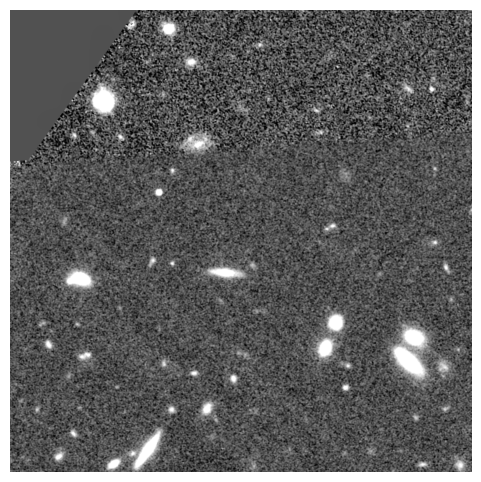

In [44]:
stretch = AsinhStretch(0.3)
norm = AsymmetricPercentileInterval(1, 99)

plt.figure(figsize=(6,6))
ax = plt.axes()
plt.imshow(stretch(norm(data[1].data[slices])), cmap='gray')
# plt.contour(segmap[1].data[slices]>0.5, alpha=0.5, levlels=[0.9,1.1], linewidths=1)


ax.axis('off')
# plt.con

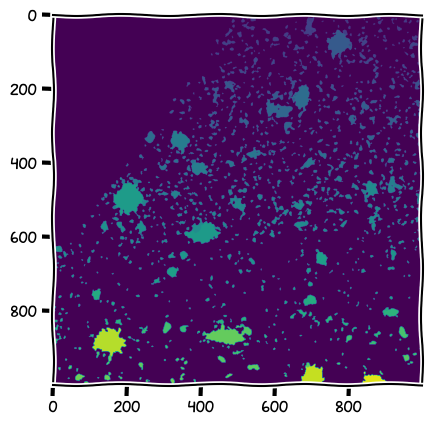

In [36]:
plt.imshow(segmap[1].data[slices])

# Clustering examples

## Make data

Three Gaussian mixtures

In [124]:
means = np.array([[0,0], [0.3, 0.4], [1.0, -0.7]])
covs =np.array([
    [[0.2**2, 0],[0, 0.2**2]], 
    [[0.2**2, -0.1*0.2],[-0.1*0.2, 0.2**2]], 
    [[0.05**2, 0],[0, 0.05**2]]
])
nsamps = [200, 300, 30]

# data = []
labels = []
for i in range(3):
    # mixture = np.random.multivariate_normal(means[i], cov=covs[i], size=nsamps[i])
    # data.append(mixture)
    labels += nsamps[i]*[i]
    
data = np.vstack(data)

## Run K-means

Try different k-values, see which one works better

In [75]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, n_init=1, init=np.array([[0.1,0.1],[1,-0.7]]))
labels2 = kmeans2.fit_predict(data)

kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=0)
labels3 = kmeans3.fit_predict(data)

Silhouette scores

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score

scores3 = silhouette_samples(data, labels3)
scores2 = silhouette_samples(data, labels2)

score3 = silhouette_score(data, labels3)
score2 = silhouette_score(data, labels2)

In [77]:
tmp = data[0]

def get_sil_score(i, X, labels):
    
    val = X[i]
    label = labels[i]
    
    minb = 1e6
    unique_ls = np.unique(labels)
    for l in unique_ls:
        cluster_samps = X[labels == l]
        avgdist = np.mean(np.linalg.norm(cluster_samps - val, axis=1))
        if l == label:
            a = avgdist
        elif avgdist < minb:
            minb = avgdist
            
    metric = (minb-a)/np.max([minb,a])
    return metric

In [78]:
# bins = np.linspace(-1,1,51)
# cm = plt.get_cmap('rainbow')

# for i in range(0,3):
#     plt.hist(scores3[labels3 == i], density=True, bins=bins,color=cm(i/4), alpha=0.5)
#     plt.axvline(np.mean(scores3[labels3 == i])+i/100, color=cm(i/4))

# plt.axvline(score3, color='k', lw=5)
# plt.xlim(-0.1,1)
# plt.xlabel('silhouette score')

Get the best number of clusters:

In [79]:
# nclus = np.arange(2,8)

# scores = []
# for n in nclus:
#     if n == 2:
#         fitter = KMeans(n_clusters=n, n_init=1, init=np.array([[0.1,0.1],[1,-0.7]]))
#     else: 
#         fitter = KMeans(n_clusters=n, n_init='auto')
        
#     labels = fitter.fit_predict(data)
#     score = silhouette_score(data, labels)
#     scores.append(score)

In [80]:
# plt.scatter(nclus, scores, color='k')
# plt.xlabel('# clusters')
# plt.ylabel('silhouette score')

/tmp/ipykernel_2411/1898573572.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(data[:,0], data[:,1], c='k', s=5, cmap='rainbow', vmin=0, vmax=4)


(-1.0, 1.2)

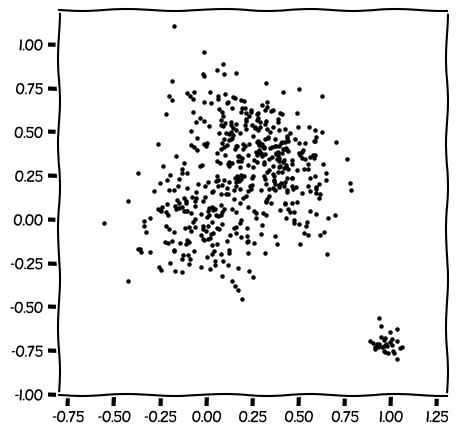

In [101]:
plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], c='k', s=5, cmap='rainbow', vmin=0, vmax=4)
# plt.scatter([
# plt.scatter(data[-1][0],data[-3][1], s=10, color='r')
# plt.scatter([0.1,1],[0.1,-0.7], color='k', marker='x', s=100)
plt.xlim(-0.8,1.3)
plt.ylim(-1,1.2)


In [41]:

# range_n_clusters = [2, 3]
# X = data

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     if n_clusters == 2:
#         clusterer = KMeans(n_clusters=2, n_init=1, init=np.array([[0.1,0.1],[1,-0.7]]), random_state=0)
#     else:
#         clusterer = KMeans(n_clusters=n_clusters, random_state=0)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm(float(i) / 4)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm(cluster_labels.astype(float) / 4)
#     ax2.scatter(
#         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(
#         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()

## GMM

In [107]:
from sklearn.mixture import GaussianMixture
import matplotlib as mpl

(-1.0, 1.2)

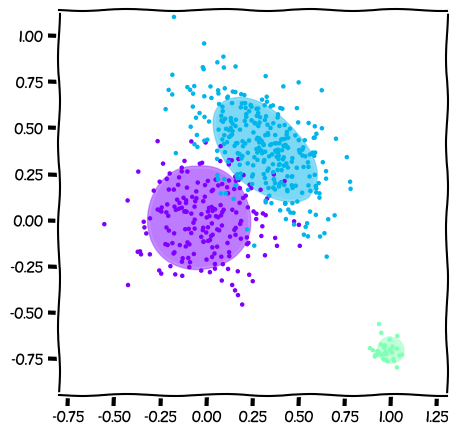

In [136]:

colors = [cm(0), cm(1/4), cm(2/4)]
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        covariances = covs[n][:2,:2]#gmm.covariances_[n][:2, :2]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.3)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")



n_classes = 3
cov_type = 'full'
estimator = GaussianMixture(n_components=n_classes, covariance_type=cov_type, random_state=0)


plt.figure(figsize=(5,5))
ax = plt.axes()

# Train the other parameters using the EM algorithm.
estimator.fit(X)
labels_gmm = estimator.predict(X)
make_ellipses(estimator, ax)

plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap='rainbow', vmin=0, vmax=4)
plt.xlim(-0.8,1.3)
plt.ylim(-1,1.2)

In [143]:
ngauss = np.arange(1,8)
bics = []
for n in ngauss:
    estimator = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=0)
    estimator.fit(X)
    bics.append(estimator.bic(X))

Text(0.5, 0, '# Gaussians')

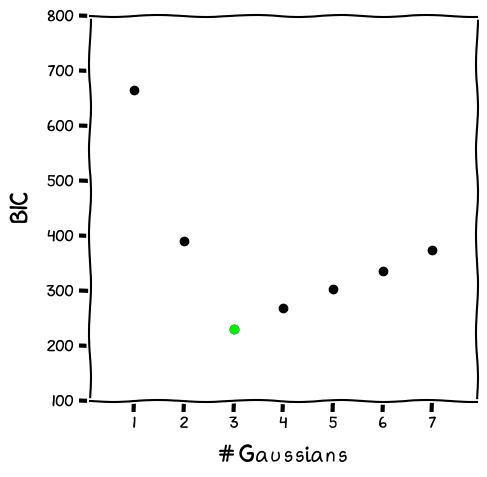

In [150]:
plt.figure(figsize=(5,5))
plt.scatter(ngauss, bics, color='k')
plt.scatter(ngauss[2], bics[2], color='#0e0')
plt.ylim(100, 800)
plt.xlim(0.1,7.9)
plt.ylabel('BIC')
plt.xlabel('# Gaussians')